# Beer Data Analysis

## This project is about analysis about different types of beer, the dataset came from StrataScratch along with the questions
### Questions

<p>In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:

1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?
</p>


In [1]:
#Importing Packages
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")

In [2]:
# Reading in data
df = pd.read_csv("BeerDataScienceProject.tar.bz2", compression="bz2")

In [27]:
# First look at stats of data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [15]:
#Checking Null values
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [3]:
# Large amount of null values, best case would be to get rid of them
df = df.dropna()
df.shape

(508358, 13)

<p>There are 0s for min of review appearance and review overall. Those could be real or just mistakes. To be safe, those records will be changed to 1. As 1 is the minimum for the other review categories </p>

In [4]:
df['review_appearance'] = df['review_appearance'].replace(0, 1)
df['review_overall'] = df['review_overall'].replace(0, 1)

In [38]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,year
count,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358,508358.000000
mean,7.017400,21824.120840,2534.273207,3.872682,3.768993,3.840811,3.775327,3.827646,2008-11-08 20:13:05.768663040,2008.348424
min,0.010000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1998-01-10 00:00:01,1998.000000
25%,5.300000,1673.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,2007-04-22 00:30:13.750000128,2007.000000
50%,6.500000,13850.000000,392.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2009-05-05 06:02:55,2009.000000
75%,8.500000,40418.000000,1315.000000,4.000000,4.000000,4.500000,4.000000,4.500000,2010-11-06 19:54:19.750000128,2010.000000
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2012-01-11 10:10:56,2012.000000
std,2.204528,22124.969107,5237.843825,0.601731,0.682355,0.706380,0.665586,0.715121,NaN,2.386048


In [39]:
#First look at data
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26,2010


#### Another thing I noticed is that review_time is in Unix Epoch time and is an integer, I want to make it a datetime so its easier to read

In [40]:
# Convert the 'review_time' column from Unix epoch to datetime
df['review_time'] = pd.to_datetime(df['review_time'], unit='s')

Lastly, I want to deal with the problem of multiple reviews. A user can leave multiple reviews on the same beer, at different times, and this can affect our results. We would like one review per beer / user combination, so we keep only the highest overall review that a user has left for each beer ID.

In [43]:
# Changing the dataset so only one review per beer/user combo
df = df.sort_values(by="review_overall", ascending=False).drop_duplicates(subset=["review_profileName", "beer_beerId"],keep="first")

## Question 1 <p></p> Rank the top 3 breweries which produce the strongest beers.

In [6]:
# This question asks about the brewery, not the 3 highest % beers in general 
q1 = df.sort_values('beer_ABV',ascending=False).drop_duplicates('beer_brewerId').head(3)
q1

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.7,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
293762,27.0,25759,35,Samuel Adams Utopias,American Strong Ale,4.0,3.5,4.0,3.5,inlimbo77,4.0,2011 version tasted at Deer Park Tavern event ...,1323187958
58570,19.5,74295,16866,Grey Monday,American Double / Imperial Stout,4.0,5.0,4.5,4.5,Hands22,5.0,Served from a cask in 6oz pours at Beachwood B...,1318997327


<p> Those are some incredibly strong beers! In the dataset the median beer is 6.5% and the average beer is 7.01% ABV</p>

<Axes: ylabel='beer_ABV'>

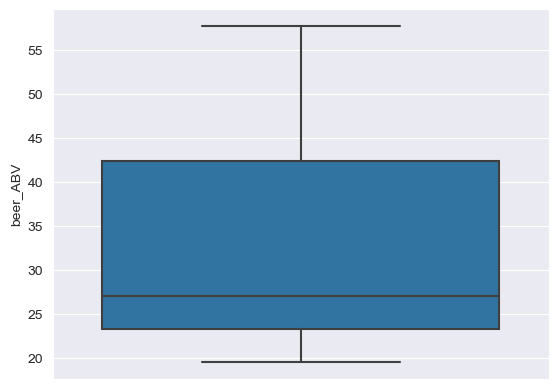

In [48]:
# Box plot showing the distribution of beer ABV  that different brewers make
sns.boxplot(q1,y='beer_ABV')

## Question 2  <p></p> Which year did beers enjoy the highest ratings?

<Axes: xlabel='year', ylabel='review_overall'>

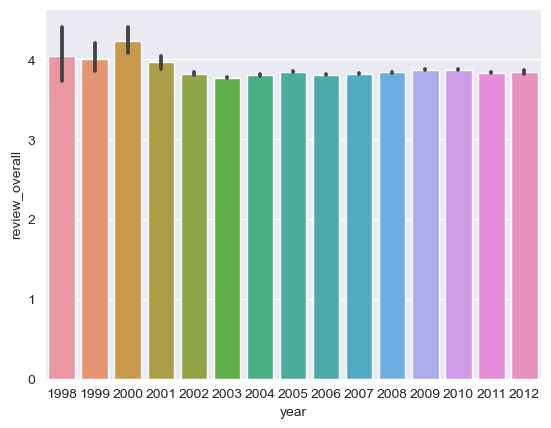

In [42]:
df['year'] = df['review_time'].dt.year
sns.barplot(df,x='year',y='review_overall')

<p>According to this data, the year 2000 had the highest reviews for beer</p>

## Question 3 <p></p> Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [60]:
# To determine the importance between the factors listed, and the users' (overall) ratings, 
# We can calculate the correlation coefficient between them and use it as an important measure.

q3 = df.groupby(by='beer_beerId')[['review_overall','review_aroma','review_taste','review_palette','review_appearance']].mean()
corr_q3 = q3.corr()
corr_q3

,review_overall,review_aroma,review_taste,review_palette,review_appearance
review_overall,1.000000,0.883838,0.823208,0.766894,0.637661
review_aroma,0.883838,1.000000,0.835019,0.825980,0.660216
review_taste,0.823208,0.835019,1.000000,0.756267,0.682249
review_palette,0.766894,0.825980,0.756267,1.000000,0.669211
review_appearance,0.637661,0.660216,0.682249,0.669211,1.000000


<p> Higher correlation means higher importance, we can see based on review overall that review aroma is the most important, followed by review taste</p>

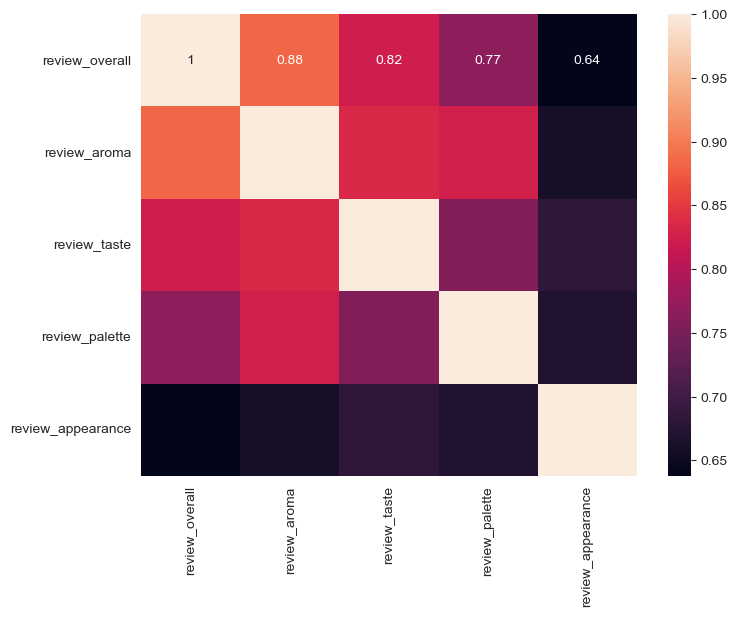

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_q3, annot=True)
plt.show()

## Question 4<p></p>If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [9]:
# I would recommend my friends the beers that have been reviewed most highly most often. Only the best for them!
q4 = df.groupby(by='beer_name')['review_overall'].agg(['count','mean'])
# Renaming columns for readability
q4 = q4.rename(columns={'count':'num_of_reviews','mean':'avg_review_score'})
#Sorting the values to show top 10
q4.sort_values(by='num_of_reviews', ascending=False, inplace=True)
q4.head(10)

,num_of_reviews,avg_review_score
beer_name,,
Sierra Nevada Celebration Ale,2998,4.168446
Sierra Nevada Pale Ale,2586,4.245940
Founders Breakfast Stout,2501,4.354658
Sierra Nevada Bigfoot Barleywine Style Ale,2491,3.966479
La Fin Du Monde,2480,4.297581
Samuel Adams Boston Lager,2416,4.044702
Chocolate Stout,2233,4.017241
Dead Guy Ale,2229,4.044639
Trappistes Rochefort 10,2170,4.339401


In [10]:
# For fun this is just the most highly rated beers as well
q4.sort_values(by='avg_review_score', ascending=False, inplace=True)
q4.head(10)

,num_of_reviews,avg_review_score
beer_name,,
Neustadt 180,1,5.0
Hopback Amber (Simcoe Dry Hopped),1,5.0
Chocolate Nutter,1,5.0
Honey Badger,1,5.0
Kimono Girl,1,5.0
Triplexxx,1,5.0
Kingfisher Super Strong,1,5.0
Cauldron Brew,1,5.0
Christmas Stark Lager,1,5.0


In [11]:
# Using describe on q4 we can see that 50% of beers have 3 reviews or less and 75% have 11 reviews or less
q4.describe()

,num_of_reviews,avg_review_score
count,14028.000000,14028.000000
mean,36.238808,3.648806
std,148.110098,0.623408
min,1.000000,1.000000
25%,1.000000,3.400000
50%,3.000000,3.750000
75%,12.000000,4.000000
max,2998.000000,5.000000


/Users/gavinmetellus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_reviews', ylabel='Count'>

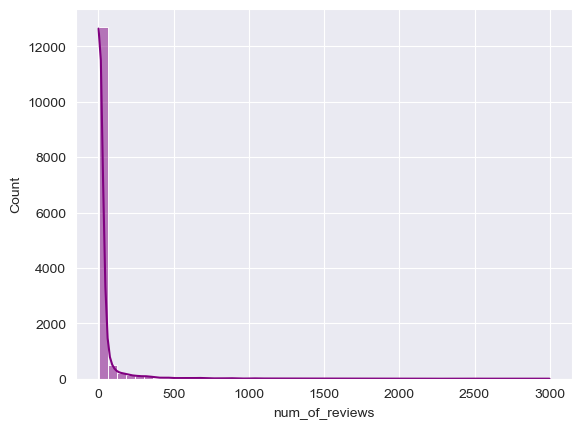

In [19]:
# Distribution for the number of reviews 
sns.histplot(data=q4, x="num_of_reviews", bins=50, kde=True,color = 'purple')

/Users/gavinmetellus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


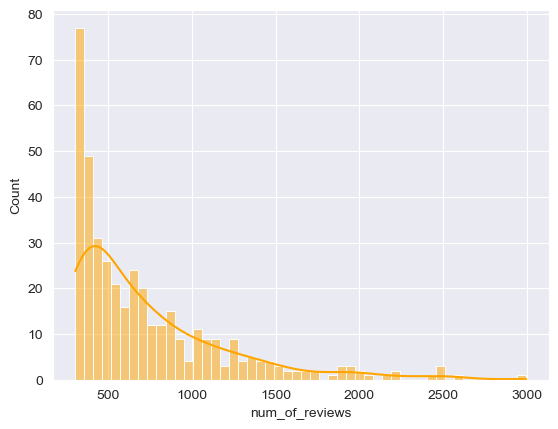

In [21]:
# Count of number of beers where there are at least 300 reviews
sns.histplot(data=q4[q4['num_of_reviews'] > 300], x='num_of_reviews', bins=50, kde=True, color='orange')
plt.show()

In [29]:
# These are the highest-reviewed, beers with a substantial number of reviews
q4[q4['num_of_reviews'] >=300].sort_values(by='avg_review_score',ascending=False).head()

,num_of_reviews,avg_review_score
beer_name,,
Heady Topper,469,4.625800
Founders CBS Imperial Stout,637,4.591052
Masala Mama India Pale Ale,662,4.488671
Founders KBS (Kentucky Breakfast Stout),1928,4.396266
Tröegs Nugget Nectar,1953,4.396057


## Question 5 <p></p>Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for that beer style?


In the previous questions we have been dealing with statistical matters, but in this question, we have some machine learning involved; natural language processing (NLP) nonetheless.

For the first part of the question, we are going to want to explore the review_text column. It is the text that the user wrote when reviewing the beer. We will use an NLP model that can analyze the sentiment in the text and label it as positive, negative, or neutral.

A suitable solution for this task is the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool.


In [30]:
from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
# this is a scored list of words and jargon that the sentiment analyser
# uses references when performing sentiment analysis
download("vader_lexicon", quiet=True)

True

In [32]:
#Creating the analyzer to read through the comments
analyser = SentimentIntensityAnalyzer()

In [33]:
#We create a new column review_sentiment which is the compound score of the review text. 
#Executing this cell will take a few minutes.
df["review_sentiment"] = df["review_text"].apply(lambda x: analyser.polarity_scores(text=x)["compound"])

In [34]:
df.groupby(by="beer_style")["review_sentiment"].agg(func=["mean", "count"]).sort_values(by="mean", ascending=False)

,mean,count
beer_style,,
Quadrupel (Quad),0.857195,4822
Dortmunder / Export Lager,0.855512,1723
Roggenbier,0.852447,140
Flanders Red Ale,0.850987,2782
Braggot,0.850845,198
...,...,...
Happoshu,0.533456,55
American Malt Liquor,0.527535,1344
Japanese Rice Lager,0.516697,493


### This is the first part of the question answered. "Quadrupel (Quad)" has the highest average review setiment, along with a sizeable number of reviews to back up that data. <p></p> Using the correlation coefficent of review sentiment with overall review score we can see how close they are
<p></p> 

In [35]:
q5 = df[df["beer_style"] == "Quadrupel (Quad)"]
q5[["review_sentiment", "review_overall"]].corr()

,review_sentiment,review_overall
review_sentiment,1.000000,0.259532
review_overall,0.259532,1.000000


<p>Not a very high correlation coefficient only about .26</p>

<Axes: >

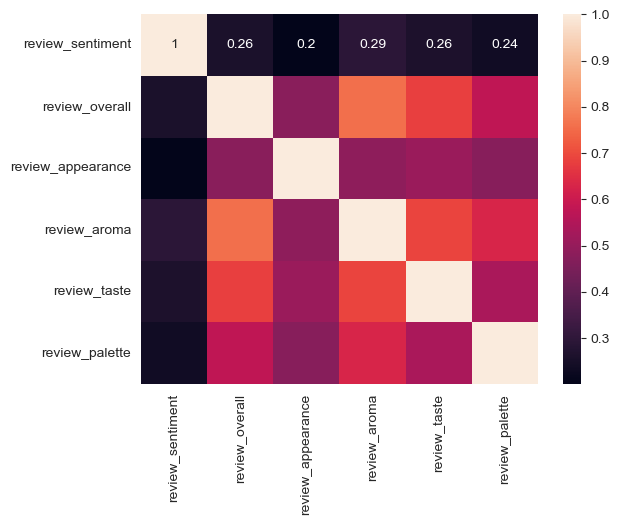

In [37]:
#Compared to everything else
sns.heatmap(data=q5[[
    "review_sentiment",
    "review_overall",
    "review_appearance",
    "review_aroma",
    "review_taste",
    "review_palette"
]].corr(), annot=True)

<p>Similar to review overall, every other category has aroung a .26 correlation. This is because a the overall review better expresses the users' opinion of the beer than the written text. Combined with the face that the text sentiment rating is from the viewpoint of a computer, because the NLP model is not performing at human-level. Moreover, a user could have given a high review of the beer, but leave a rather neutral comment / text. This contributes to the low correlation coefficient. The overall gist is that the coefficient is positive, indicating that increase in the compound score is correlated with an increase in the overall review score.</p>